In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

In [2]:
tau = 26.0             # lifetime of charged pion (ns)
dt = 1.0               # size of time interval (ns)
tmax = 100             # time range (ns)
prob = dt/tau          # decay probability in interval dt

In [3]:
time = np.arange(0.0,tmax,dt,dtype=int)
Npdata = np.zeros(tmax,dtype=float)
Nmdata = np.zeros(tmax,dtype=float)
dNpdata = np.zeros(tmax,dtype=float)
dNmdata = np.zeros(tmax,dtype=float)

In [5]:
Npi = 10000            # pion number
Nmu = 0                # muon number
for it in range(tmax): # loop over time steps
    Npdata[it] = Npi
    Nmdata[it] = Nmu
    dNpdata[it] = np.sqrt(Npi)
    dNmdata[it] = np.sqrt(Nmu)
    Ndecay = 0
    for ip in range(Npi): # loop over surviving pions
        if np.random.ranf() < prob:
            Ndecay += 1
    Npi -= Ndecay
    Nmu += Ndecay

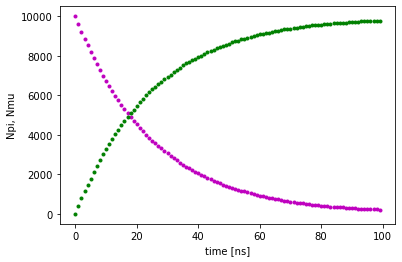

In [6]:
plt.plot(time,Npdata,"m.")
plt.plot(time,Nmdata,"g.")
plt.xlabel("time [ns]")
plt.ylabel("Npi, Nmu")
plt.savefig('Npi Nmu versus time.png')

In [ ]:
# set fit range
tmin = 10
tmax = 100
#time = time[tmin:tmax]
#Npdata = Npdata[tmin:tmax]
#Nmdata = Nmdata[tmin:tmax]
#dNpdata = dNpdata[tmin:tmax]
#dNmdata = dNmdata[tmin:tmax]

In [ ]:
def fpi(t, p1, p2):
    return p1*np.exp(-t/p2)
pars, covs = fit.curve_fit(fpi, time[tmin:tmax], Npdata[tmin:tmax], p0=[Npi,25.])
Npfit1 = fpi(time, pars[0], pars[1])
plt.plot(time,Npdata,"m.")
plt.plot(time,Npfit1,"b-")
print( "pion counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))


In [ ]:
def fmu(t, p1, p2):
    return p1*(1.-np.exp(-t/p2))
pars, covs = fit.curve_fit(fmu, time, Nmdata, p0=[0.,25.])
Nmfit1 = fmu(time, pars[0], pars[1])
plt.plot(time,Nmdata,"g.")
plt.plot(time,Nmfit1,"r-")
print( "muon counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))

In [ ]:
def fpi(t, p1, p2):
    return p1*np.exp(-t/p2)
pars, covs = fit.curve_fit(fpi, time, Npdata, sigma = dNpdata, p0=[Npi,25.], absolute_sigma=True)
Npfit2 = fpi(time, pars[0], pars[1])
plt.plot(time,Npdata,"m.")
plt.plot(time,Npfit2,"b-")
print( "pion counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))

In [ ]:
def fmu(t, p1, p2):
    return p1*(1.-np.exp(-t/p2))
pars, covs = fit.curve_fit(fmu, time, Nmdata, sigma = dNmdata, p0=[0.,25.], absolute_sigma=True)
Nmfit2 = fmu(time, pars[0], pars[1])
#dNmfit = np.sqrt(Nmfit2)
#pars, covs = fit.curve_fit(fmu, time, Nmdata, sigma = dNmfit, p0=[0.,25.], absolute_sigma=True)
#Nmfit3 = fmu(time, pars[0], pars[1])
plt.plot(time,Nmdata,"g.")
plt.plot(time,Nmfit2,"r-")
print( "muon counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))

In [ ]:
dNpfit = np.sqrt(Npfit2)
pars, covs = fit.curve_fit(fpi, time, Npdata, sigma = dNpfit, p0=[Npi,25.], absolute_sigma=True)
Npfit3 = fpi(time, pars[0], pars[1])
plt.plot(time,Npdata,"m.")
plt.plot(time,Npfit3,"b-")
print( "pion counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))

In [ ]:
dNmfit = np.sqrt(Nmfit2)
pars, covs = fit.curve_fit(fmu, time, Nmdata, sigma = dNmfit, p0=[0.,25.], absolute_sigma=True)
Nmfit3 = fmu(time, pars[0], pars[1])
plt.plot(time,Nmdata,"g.")
plt.plot(time,Nmfit3,"r-")
print( "muon counting method, tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))

In [ ]:
plt.plot(time,Npfit2-Npfit1,"b-")
plt.plot(time,Npfit3-Npfit2,"m-")

In [ ]:
plt.plot(time,Nmfit2-Nmfit1,"b-")
plt.plot(time,Nmfit3-Nmfit2,"m-")